**Question no 1**

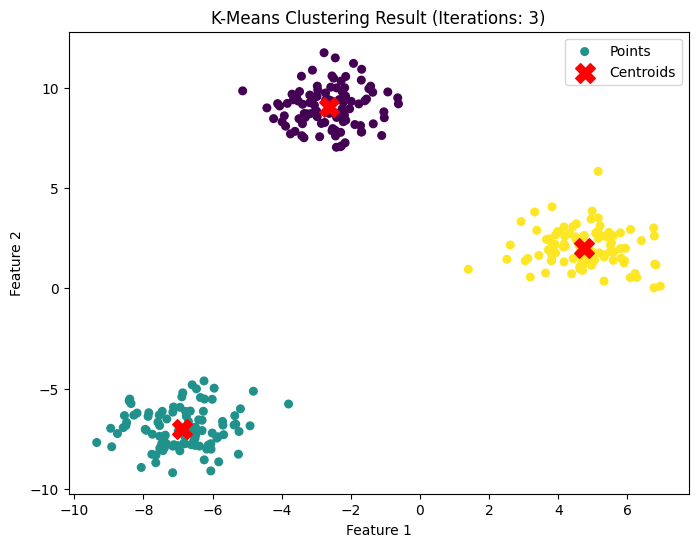

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def k_means(X, k, max_iter=100, tol=1e-4, random_state=None):
    np.random.seed(random_state)
    n_samples, n_features = X.shape

    random_indices = np.random.choice(n_samples, k, replace=False)
    centroids = X[random_indices]

    for i in range(max_iter):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centr = np.array([X[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i] for i in range(k)])

        centroid_shifts = np.linalg.norm(new_centr - centroids, axis=1)
        if np.max(centroid_shifts) < tol:
            break

        centroids = new_centr

    return centroids, labels, i + 1

if __name__ == "__main__":
    X, y_true = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)

    centroids, labels, n_iter = k_means(X, k=3, max_iter=100, tol=1e-4, random_state=42)

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, label='Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(f'K-Means Clustering Result (Iterations: {n_iter})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


**Question no 2**

In [ ]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

image = Image.open("Screenshot 2025-06-14 200744.png")
image = image.convert("RGB")
img_np = np.array(image)

w, h = image.size
pixels = img_np.reshape(-1, 3)

kmeans = KMeans(n_clusters=16, init='k-means++', random_state=42)
kmeans.fit(pixels)
centroids = kmeans.cluster_centers_.astype('uint8')
labels = kmeans.labels_

compressed_pixels = centroids[labels]
compressed_img_np = compressed_pixels.reshape(img_np.shape)
compressed_image = Image.fromarray(compressed_img_np)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(compressed_image)
ax[1].set_title("16-color Compressed Image")
ax[1].axis('off')

plt.show()

original_path = "original_image.png"
compressed_path = "compressed_image.png"
image.save(original_path, format='PNG')
compressed_image.save(compressed_path, format='PNG')

original_size = os.path.getsize(original_path)
compressed_size = os.path.getsize(compressed_path)
reduction = (original_size - compressed_size) / original_size * 100

print(f"Original file size: {original_size} bytes")
print(f"Compressed file size: {compressed_size} bytes")
print(f"Percentage reduction: {reduction:.2f}%")


FileNotFoundError: [Errno 2] No such file or directory: 'Screenshot 2025-06-14 200744.png'

**Question no 3**

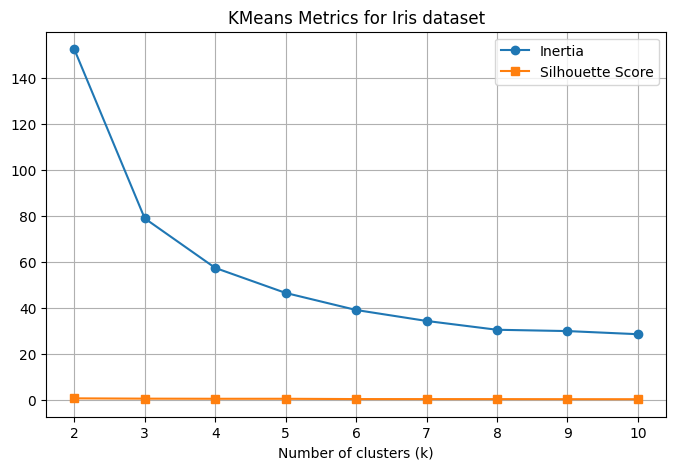

k_elbow (inertia drop < 10%): 8
k_silhouette (max silhouette score): 2
The two k values do not agree.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

iris = load_iris()
X = iris.data

ks = range(2, 11)
inertias = []
sil_scores = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))

plt.figure(figsize=(8,5))
plt.plot(ks, inertias, marker='o', label='Inertia')
plt.plot(ks, sil_scores, marker='s', label='Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.title('KMeans Metrics for Iris dataset')
plt.legend()
plt.grid(True)
plt.show()

drops = np.diff(inertias)
percent_drops = -100 * np.diff(inertias) / inertias[:-1]

k_elbow = None
for i in range(1, len(percent_drops)):
    if percent_drops[i] < 10:
        k_elbow = ks[i]
        break

best_sil_idx = np.argmax(sil_scores)
k_silhouette = ks[best_sil_idx]

print(f"k_elbow (inertia drop < 10%): {k_elbow}")
print(f"k_silhouette (max silhouette score): {k_silhouette}")
if k_elbow == k_silhouette:
    print("The two k values agree.")
else:
    print("The two k values do not agree.")


**Question no 4**

In [ ]:
import time
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score

def benchmark_kmeans():
    X, y_true = make_blobs(n_samples=1000000, n_features=10, centers=10, random_state=42)
    results = {}

    t0 = time.perf_counter()
    kmeans = KMeans(n_clusters=10, random_state=42)
    kmeans.fit(X)
    t1 = time.perf_counter()

    results['KMeans'] = {
        'time': t1 - t0,
        'inertia': kmeans.inertia_,
        'ARI': adjusted_rand_score(y_true, kmeans.labels_)
    }

    t0 = time.perf_counter()
    minibatch = MiniBatchKMeans(n_clusters=10, batch_size=10000, random_state=42)
    minibatch.fit(X)
    t1 = time.perf_counter()

    results['MiniBatchKMeans'] = {
        'time': t1 - t0,
        'inertia': minibatch.inertia_,
        'ARI': adjusted_rand_score(y_true, minibatch.labels_)
    }

    print("Method\t\tTime(s)\t\tInertia\t\tARI")
    print(f"KMeans\t\t{results['KMeans']['time']:.2f}\t\t{results['KMeans']['inertia']:.2f}\t\t{results['KMeans']['ARI']:.4f}")
    print(f"MiniBatch\t{results['MiniBatchKMeans']['time']:.2f}\t\t{results['MiniBatchKMeans']['inertia']:.2f}\t\t{results['MiniBatchKMeans']['ARI']:.4f}")

    return results

benchmark_kmeans()

Method		Time(s)		Inertia		ARI
KMeans		1.12		10000158.70		1.0000
MiniBatch	0.31		10000842.53		1.0000


{'KMeans': {'time': 1.1155646269999124,
  'inertia': 10000158.698950559,
  'ARI': 1.0},
 'MiniBatchKMeans': {'time': 0.30547502500007795,
  'inertia': 10000842.529979564,
  'ARI': 1.0}}

**Question no 5**

In [ ]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

def my_cosine_kmeans(X, n_clusters=4, max_iter=100, random_state=42):
    np.random.seed(random_state)
    N, D = X.shape

    X = normalize(X, norm='l2', axis=1)

    indices = np.random.choice(N, n_clusters, replace=False)
    centroids = X[indices].toarray()
    centroids = normalize(centroids, norm='l2', axis=1)

    empty_reinit_count = 0

    for it in range(max_iter):
        sim = X @ centroids.T
        sim = sim if isinstance(sim, np.ndarray) else sim.toarray()

        labels = np.argmax(sim, axis=1)

        for i in range(n_clusters):
            idx = np.where(labels == i)[0]
            if len(idx) == 0:
                sims_to_cents = X @ centroids.T
                sims_to_cents = sims_to_cents if isinstance(sims_to_cents, np.ndarray) else sims_to_cents.toarray()
                min_sims = np.max(sims_to_cents, axis=1)
                farthest_idx = np.argmin(min_sims)
                centroids[i] = X[farthest_idx].toarray().flatten()
                empty_reinit_count += 1
            else:
                members = X[idx].toarray()
                mean_vec = members.mean(axis=0)
                norm = np.linalg.norm(mean_vec) + 1e-10
                centroids[i] = mean_vec / norm

    final_sim = X @ centroids.T
    final_sim = final_sim if isinstance(final_sim, np.ndarray) else final_sim.toarray()
    best_sim = final_sim[np.arange(N), labels]
    inertia = np.sum(1 - best_sim)

    return inertia, empty_reinit_count, labels

cats = ['sci.space', 'sci.med', 'sci.electronics', 'sci.crypt']
newsgroups = fetch_20newsgroups(subset='train', categories=cats)
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(newsgroups.data[:5000])

inertia, reinit_count, labels = my_cosine_kmeans(X, n_clusters=4)

print(f"Final cosine distance inertia: {inertia:.4f}")
print(f"Empty cluster re-inits: {reinit_count}")


Final cosine distance inertia: 1679.5891
Empty cluster re-inits: 0
